# Imports

Lets start with imports 

In [ ]:
import torch

Pytorch is used thorughout the code. This library offers tensor capabilities that we will use in coding the NN.

# Analyzing the network 

Lets first have a look at what network we will be coding today. To focus more on the process, lets keep the code simpler. To ensure this I will use a network as shown :

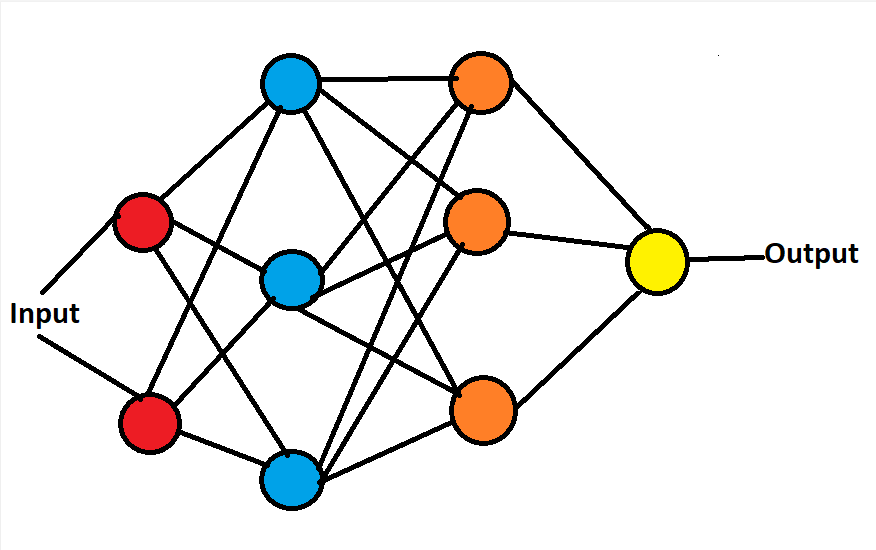

The network has 4 layers. An input layer, two hidden layers and an output layer. We will use ReLu activation for the first three layers and then sigmoid activation for the output neuron.

Note that we will refer to the layer neurons by colours.

# Weights and Biases 

Weights and Biases are what the model gets updated to train. They are integral to the functioning of the neural network.

A **weight** is what decides the prominence of a particular edge of the network. The edges are shown as the black lines in the diagram above.

A **bias** is an inherent property of a particular neuron. Biases are not shown for the neurons in the diagram but are understood to be present. 

In [ ]:
# lets use random weights and biases 

blue_weights = torch.rand((3,2), requires_grad = True)
orange_weights = torch.rand((3,3), requires_grad = True)
yellow_weights = torch.rand((1,3), requires_grad = True)


Here we name the weights tensors as per the layer from which the edges **terminate**. 

The command torch.rand((x,y), requires_grad="True/False") creates a tensor with random values of size (x,y) and keep track of whether or not to include it in gradient calculation. The gradient will be used for gradient descent. 

In [ ]:
# now for the biases

blue_bias = torch.rand((1,3), requires_grad = True)
orange_bias = torch.rand((1,3), requires_grad = True)
yellow_bias = torch.rand((1,1), requires_grad = True)

# Let us also define the inputs

input = torch.rand((1,2), requires_grad = False)

Biases are labelled as per the layer they apply to.

# Forward Pass

This is the part of the network where the output value is calculated. This step follows matrix multiplication. 

The output of any neuron can be understood to be given by:

$ input \times weight + bias $

since we are using tensors to store inputs, weights and biases, we see that we need not repeat the multiplication sepertely for each neuron as matrix multiplication generates a matrix of corresponding outputs. 

Further the output of one intermediate layer becomes input for the subsequent layer. So we will define a function for this purpose to enhance reusability.

In [ ]:
def forward(input, weights, biases):
  output = input@weights.T + biases
  output = torch.relu(output)
  return output

Since we used relu activation we cannot use this function for the output layer. We will code that seperately.

In [ ]:
blue_forward = forward(input, blue_weights, blue_bias)
orange_forward = forward(blue_forward, orange_weights, orange_bias)

# now for the yellow layer's output

yellow_forward = orange_forward@yellow_weights.T + yellow_bias
yellow_forward = torch.sigmoid(yellow_forward)

# True Values 

Now lets define what the true output for each layer should be. This is necessary to find the loss/cost value.

In [ ]:
blue_output_true = torch.rand((1,3), requires_grad = False)
orange_output_true = torch.rand((1,3), requires_grad = False)
yellow_output_true = torch.rand((1,1), requires_grad = False)

Here we set requires_grad = False as we do not want the gradient to be included in out gradient descent.

Also, the use of torch.rand means that the loss value will change if we re-run this code. This is however not an issue as we want to observe only the training which will reflect as a drop in loss value.

# Loss 

Broadly loss functions can be classified into two categories:



*   Regression and Classification losses,  $MSE = \frac{\sum_{i=1}^n (y_i-y_{true})^2}{N}$
*   Cross Entropy loss, $-(y_ilog(y_{true}) + (1-y_i)log(1-y_{true}))$



We will use mean-squared error loss. This is defined as: 

$ (true_{value} - predicted_{value})^2 $ 

In [ ]:
blue_loss = torch.mean((blue_forward-blue_output_true)**2)
orange_loss = torch.mean((orange_forward-orange_output_true)**2)
yellow_loss = torch.mean((yellow_forward-yellow_output_true)**2)

# torch.grad

Lets now take a look at the function that allows us to perform gradient descent. This is very useful function and we will attempt to understand it using an example

In [ ]:
# lets take the polynomial y = x^2 + 3x + 5

x = torch.rand(1, requires_grad = True)
print(x)

y = x**2 + 3*x + 5
y.backward()
print(x.grad) # finds dy/dx 


We see that the differentiation of y gives 2x +3 and for the x value in the tensor that is generated randomly the x.grad gives $\frac{dy}{dx}$ at that x value. 

y.backward() starts the gradient calculation process by telling pytorch to run back through all the tensors with requires_grad = True for y and x.grad tells pytorch to find $\frac{dy}{dx}$.

# Back Propogation

Now we will get into the part of the code that trains the model. The back propogation code:

In [ ]:
# Back propogation (gradient calculation and updation of connections):
# The learning rate is fixed at 0.01

yellow_loss.backward(retain_graph=True)
with torch.no_grad():
  yellow_weights = yellow_weights - 0.01*yellow_weights.grad
  yellow_bias = yellow_bias - 0.01*yellow_bias.grad
  orange_weights = orange_weights - 0.01*orange_weights.grad
  orange_bias = orange_bias - 0.01*orange_bias.grad
  blue_weights = blue_weights - 0.01*blue_weights.grad
  blue_bias = blue_bias - 0.01*blue_bias.grad


Here the learning rate is the updation number. tensor.backward() is the pytorch command that initiates backpropogation. tensor.grad accesses the backpropogation tree for the specific gradient for that tensor.

# New Output

Now we will run forward pass again and see the drop in the loss value. We will consider the output layer's loss as generally this is the loss that means the most in applications.

In [ ]:
print("Earlier loss = ", yellow_loss.item())

# New forward pass : 

blue_forward = forward(input, blue_weights, blue_bias)
orange_forward = forward(blue_forward, orange_weights, orange_bias)

# now for the yellow layer's output

yellow_forward = orange_forward@yellow_weights.T + yellow_bias
yellow_forward = torch.sigmoid(yellow_forward)

# New loss values : 

blue_loss = torch.mean((blue_forward-blue_output_true)**2)
orange_loss = torch.mean((orange_forward-orange_output_true)**2)
yellow_loss = torch.mean((yellow_forward-yellow_output_true)**2)

print("New loss = ", yellow_loss.item())

We see the loss value decreased... So it works !!

# Pytorch Linear Layers (Further Reference)

Coding from scratch is not always feasible when too many layers are involved. For this purpose pytorch offers functions to define linear layers of neurons in a single line. 

In [ ]:
# lets define the blue layer using nn.linear

blue_layer = torch.nn.Linear(2, 3, bias = True)

# The above line is all it took to define the layer

input_tensor = torch.rand(2)
output_tensor = blue_layer(input_tensor)
print(output_tensor.size())